In [12]:
#import necessary libraries

import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
#%matplotlib widget


In [2]:
#tell python where the data is located, based on the current folder
filePath = "..//..//data//"
# tell what is the file name we will open and load data
fileName = "test22021-12-06T18_13_52.csv"



In [3]:
#load data into "data" variable
data = pd.read_csv(filePath+fileName)
#display data
data

,Item1.Item1.Item1.brightAverage,Item1.Item1.Item2.runningAverage,Item1.Item2.Item1.brightAverage,Item1.Item2.Item2.runningAverage,Item1.Item3.Item1.brightAverage,Item1.Item3.Item2.runningAverage,Item1.Item4.Item1.brightAverage,Item1.Item4.Item2.runningAverage,Item1.Item5.Item1.brightAverage,Item1.Item5.Item2.runningAverage,...,Item4.Item2.Item1.brightAverage,Item4.Item2.Item2.runningAverage,Item4.Item3.Item1.brightAverage,Item4.Item3.Item2.runningAverage,Item4.Item4.Item1.brightAverage,Item4.Item4.Item2.runningAverage,Item4.Item5.Item1.brightAverage,Item4.Item5.Item2.runningAverage,Item4.Item6.Item1.brightAverage,Item4.Item6.Item2.runningAverage
0,55.973558,56.541233,63.473214,65.308649,56.236364,57.303620,58.592262,59.299659,63.140000,62.286467,...,60.379487,61.039817,63.292614,65.821528,72.654545,69.728204,68.454545,67.599394,60.419444,60.680379
1,55.918269,56.578349,63.250000,65.306863,56.178788,57.303064,63.290000,59.303975,58.651786,62.285523,...,60.935897,61.041313,63.309659,65.823138,72.663636,69.728608,68.500000,67.599556,60.500000,60.682092
2,58.309896,56.579230,66.795455,65.366874,56.251515,57.349862,58.613095,59.230243,63.163333,62.361715,...,60.976923,61.041185,63.338068,65.825174,72.612121,69.685540,68.412338,67.597825,60.452778,60.683944
3,55.920673,56.539810,66.688312,65.366766,56.103030,57.350468,58.654762,59.234211,63.163333,62.360826,...,61.043590,61.031997,63.303977,65.826500,72.639394,69.687813,68.457792,67.597284,63.221212,60.684962
4,58.226562,56.576419,63.309524,65.310502,59.033333,57.352792,58.595238,59.236046,63.223333,62.360049,...,60.992308,61.030544,63.414773,65.982898,72.596970,69.534164,68.376623,67.594957,60.572222,60.639377
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91735,75.745192,71.821790,64.585317,69.159314,85.116477,81.534364,79.597222,85.026376,71.764103,81.905734,...,67.029412,82.574841,80.084135,80.548216,85.255208,86.754530,89.163690,86.390620,100.084848,88.761223
91736,75.516827,71.636354,64.609127,69.343870,85.514205,81.494129,79.930556,84.883943,70.843672,82.181281,...,67.095703,82.777196,80.002404,80.166829,88.569444,86.760867,88.755952,86.378964,99.954545,88.621528
91737,75.610577,71.639078,64.688492,69.341588,85.323864,81.394356,79.847222,84.730870,84.960227,82.472271,...,80.225962,83.118569,67.361328,80.157895,99.966667,86.767533,88.713889,86.323448,88.208333,88.586348
91738,75.555288,71.643445,64.623016,69.341125,85.454545,81.300625,82.907738,84.819780,72.271795,82.237976,...,77.931373,83.241887,80.168269,80.358323,88.919444,86.587209,88.949405,86.270902,93.622222,88.754656


In [4]:
#show the names of each column
# from this we learn that the data is organised pairwise, that is every two columns come from a specific ROI,
# with the first column being the average brightness of a ROI and the second the running average of the same ROI
#print(data.columns)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91740 entries, 0 to 91739
Data columns (total 48 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Item1.Item1.Item1.brightAverage   91740 non-null  float64
 1   Item1.Item1.Item2.runningAverage  91740 non-null  float64
 2   Item1.Item2.Item1.brightAverage   91740 non-null  float64
 3   Item1.Item2.Item2.runningAverage  91740 non-null  float64
 4   Item1.Item3.Item1.brightAverage   91740 non-null  float64
 5   Item1.Item3.Item2.runningAverage  91740 non-null  float64
 6   Item1.Item4.Item1.brightAverage   91740 non-null  float64
 7   Item1.Item4.Item2.runningAverage  91740 non-null  float64
 8   Item1.Item5.Item1.brightAverage   91740 non-null  float64
 9   Item1.Item5.Item2.runningAverage  91740 non-null  float64
 10  Item1.Item6.Item1.brightAverage   91740 non-null  float64
 11  Item1.Item6.Item2.runningAverage  91740 non-null  float64
 12  Item

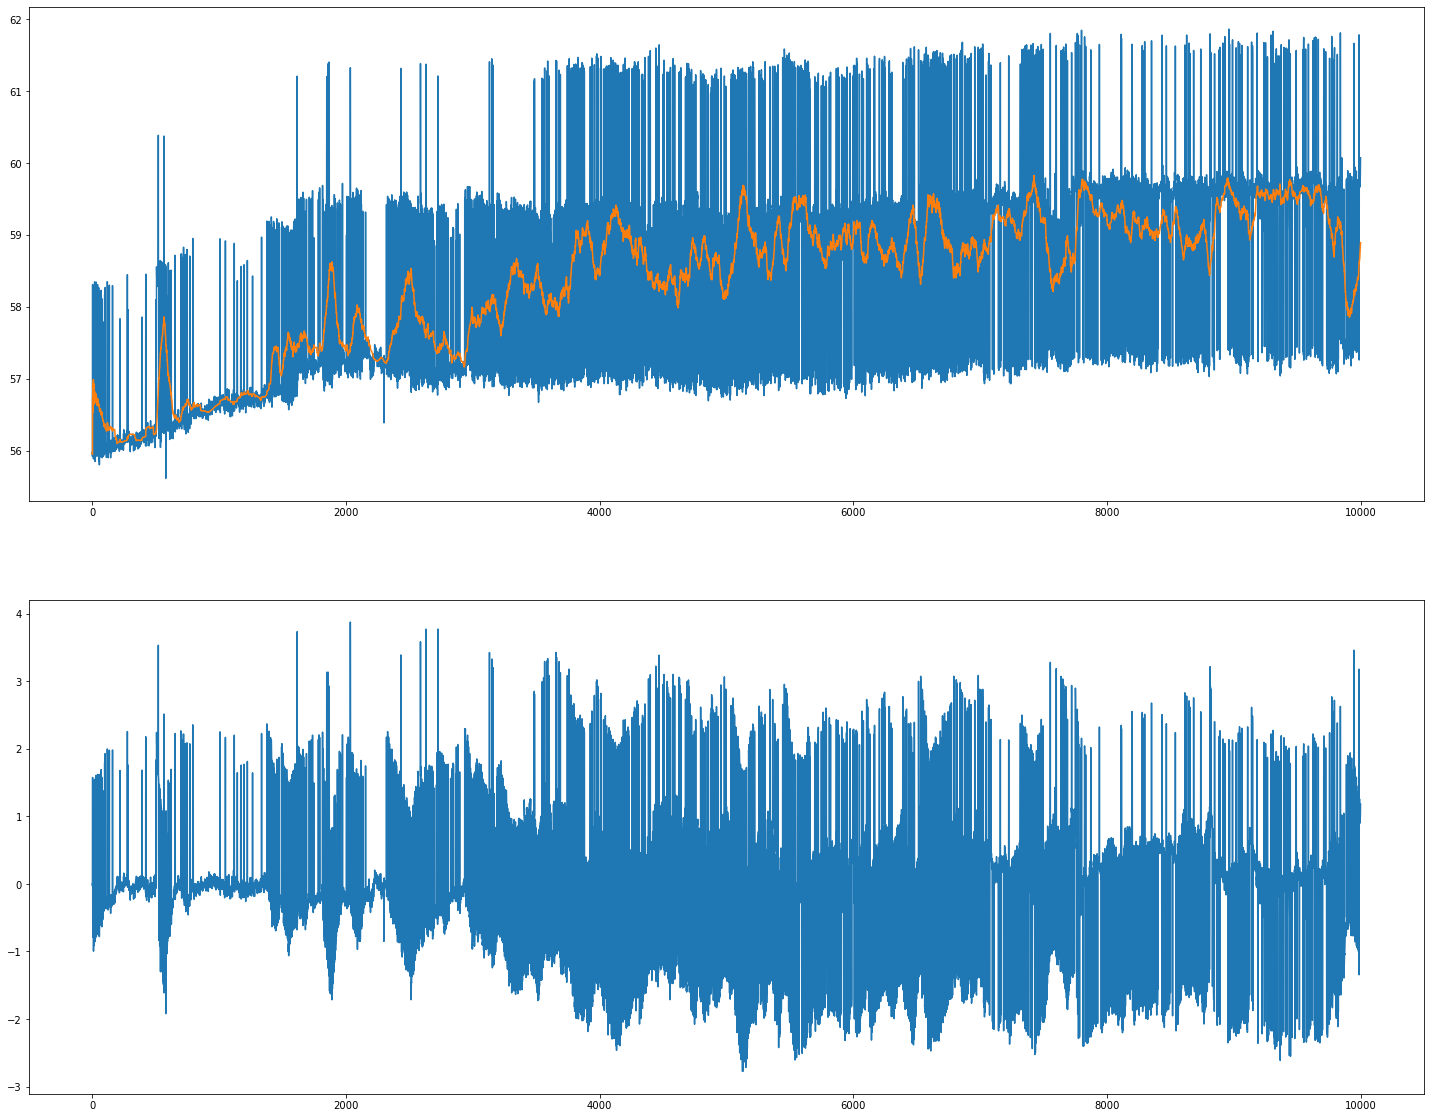

In [46]:
roll = 60
maxlen=10000
fig = plt.figure(figsize=[25,20])
sub1=plt.subplot(2,1,1)
plt.plot(data["Item1.Item1.Item1.brightAverage"][0:maxlen])
plt.plot(data["Item1.Item1.Item1.brightAverage"].rolling(roll, min_periods=1).mean()[0:maxlen])
sub2=plt.subplot(2,1,2)
plt.plot(data["Item1.Item1.Item1.brightAverage"][0:maxlen]-data["Item1.Item1.Item1.brightAverage"].rolling(roll, min_periods=1).mean()[0:maxlen])


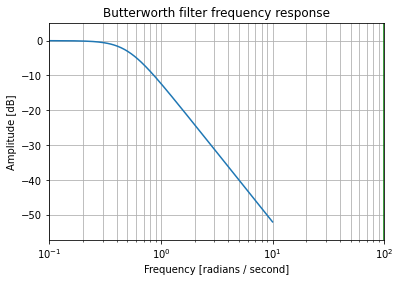

In [85]:
b, a = signal.butter(2, 0.5, 'low', analog=True)
w, h = signal.freqs(b, a)

filtered = signal.filtfilt(b,a, data["Item1.Item1.Item1.brightAverage"])


plt.semilogx(w, 20 * np.log10(abs(h)))
plt.title('Butterworth filter frequency response')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(100, color='green') # cutoff frequency
plt.show()

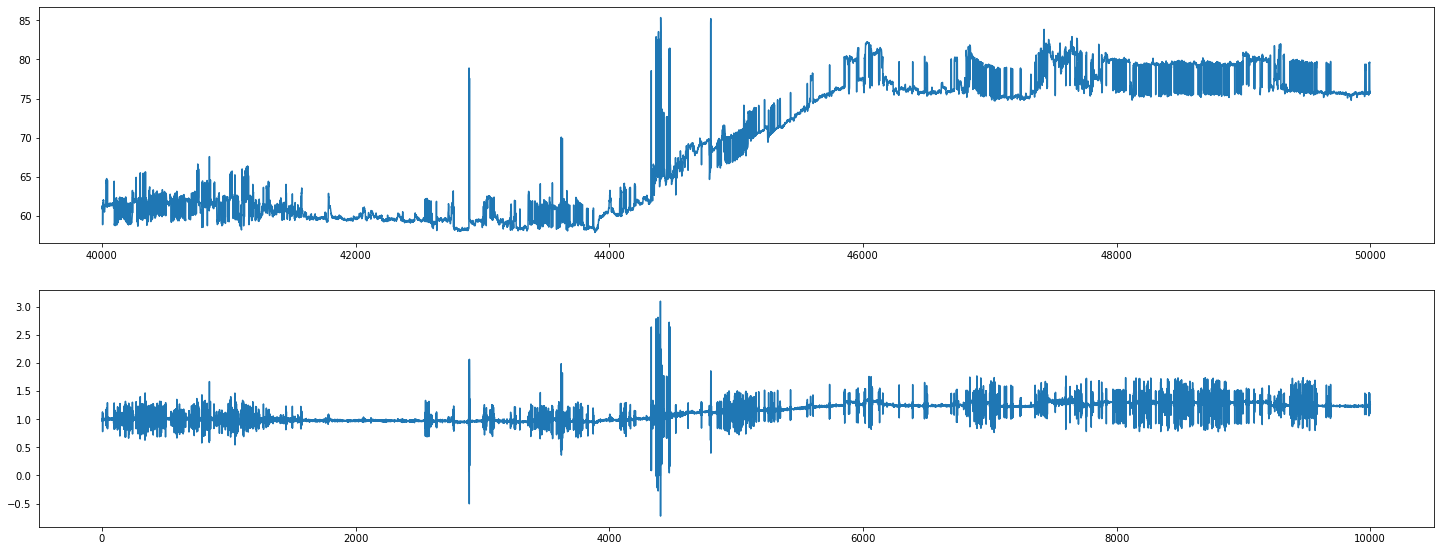

In [86]:

maxlen=2000
fig = plt.figure(figsize=[25,20])
#sub1=plt.subplot(4,1,1)
#plt.plot(data["Item1.Item1.Item1.brightAverage"][40000:50000])
#plt.plot(filtered[40000:50000])
#sub2=plt.subplot(4,1,2)

sub3=plt.subplot(4,1,1)
plt.plot(data["Item1.Item1.Item1.brightAverage"][40000:50000])

sub4=plt.subplot(4,1,2)
plt.plot(filtered[40000:50000])

In [10]:
#create an empty dataframe to store new arrays that are the running average subtracted from the average brightness in each roi
detrended = pd.DataFrame(index =list(range(len(data))))
#run a loop to pairwise subtract the running average from the brightness average
j=0
for i in range(0,len(data.columns),2):
    temp = pd.DataFrame(data[data.columns[i]]-data[data.columns[i+1]],columns=["ROI"+str(j+1)])
    detrended = detrended.join(temp,)
    j=j+1

# do the square root of the square of each value to get only positive values    
detrended = np.sqrt(detrended**2)
detrended

,ROI1,ROI2,ROI3,ROI4,ROI5,ROI6,ROI7,ROI8,ROI9,ROI10,...,ROI15,ROI16,ROI17,ROI18,ROI19,ROI20,ROI21,ROI22,ROI23,ROI24
0,0.567675,1.835435,1.067256,0.707398,0.853533,0.363507,7.069608,6.212005,0.133730,0.290801,...,0.630804,0.713848,0.052799,0.176460,0.378504,0.660330,2.528914,2.926342,0.855152,0.260934
1,0.660079,2.056863,1.124277,3.986025,3.633737,0.412904,3.134052,6.173369,0.255851,0.184740,...,0.544045,0.577466,0.032748,0.147757,0.216667,0.105416,2.513479,2.935028,0.900444,0.182092
2,1.730666,1.428580,1.098347,0.617148,0.801618,0.356897,3.813104,4.555788,0.214820,0.192103,...,0.561924,0.873981,0.113051,0.040720,0.222393,0.064262,2.487106,2.926581,0.814513,0.231166
3,0.619137,1.321546,1.247438,0.579449,0.802507,0.375404,6.936707,6.311750,0.160022,0.282904,...,0.643338,0.865396,0.101082,0.017803,0.106282,0.011593,2.522522,2.951581,0.860509,2.536250
4,1.650144,2.000979,1.680542,0.640808,0.863285,0.359008,3.859838,4.569642,0.247345,0.201735,...,1.062823,0.914745,0.164566,0.137433,0.193889,0.038236,2.568125,3.062806,0.781667,0.067155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91735,3.923403,4.573996,3.582113,5.429154,10.141631,8.007834,10.472264,2.857781,7.978575,19.262755,...,3.434829,2.064303,4.415125,1.261967,0.967391,15.545430,0.464082,1.499321,2.773070,11.323625
91736,3.880473,4.734743,4.020075,4.953388,11.337609,7.938248,9.340578,2.691109,8.412349,16.280620,...,3.167262,3.936659,0.762703,2.229815,1.209492,15.681493,0.164425,1.808578,2.376989,11.333017
91737,3.971499,4.653096,3.929508,4.883648,2.487956,7.612235,13.937139,2.908407,8.615468,16.729311,...,1.980181,1.193589,0.553754,1.623693,1.719814,2.892608,12.796566,13.199133,2.390441,0.378015
91738,3.911843,4.718109,4.153921,1.912042,9.966182,7.427339,5.027294,11.810724,8.850109,17.348898,...,0.824200,1.356326,0.775913,1.556302,2.304431,5.310514,0.190053,2.332235,2.678503,4.867566


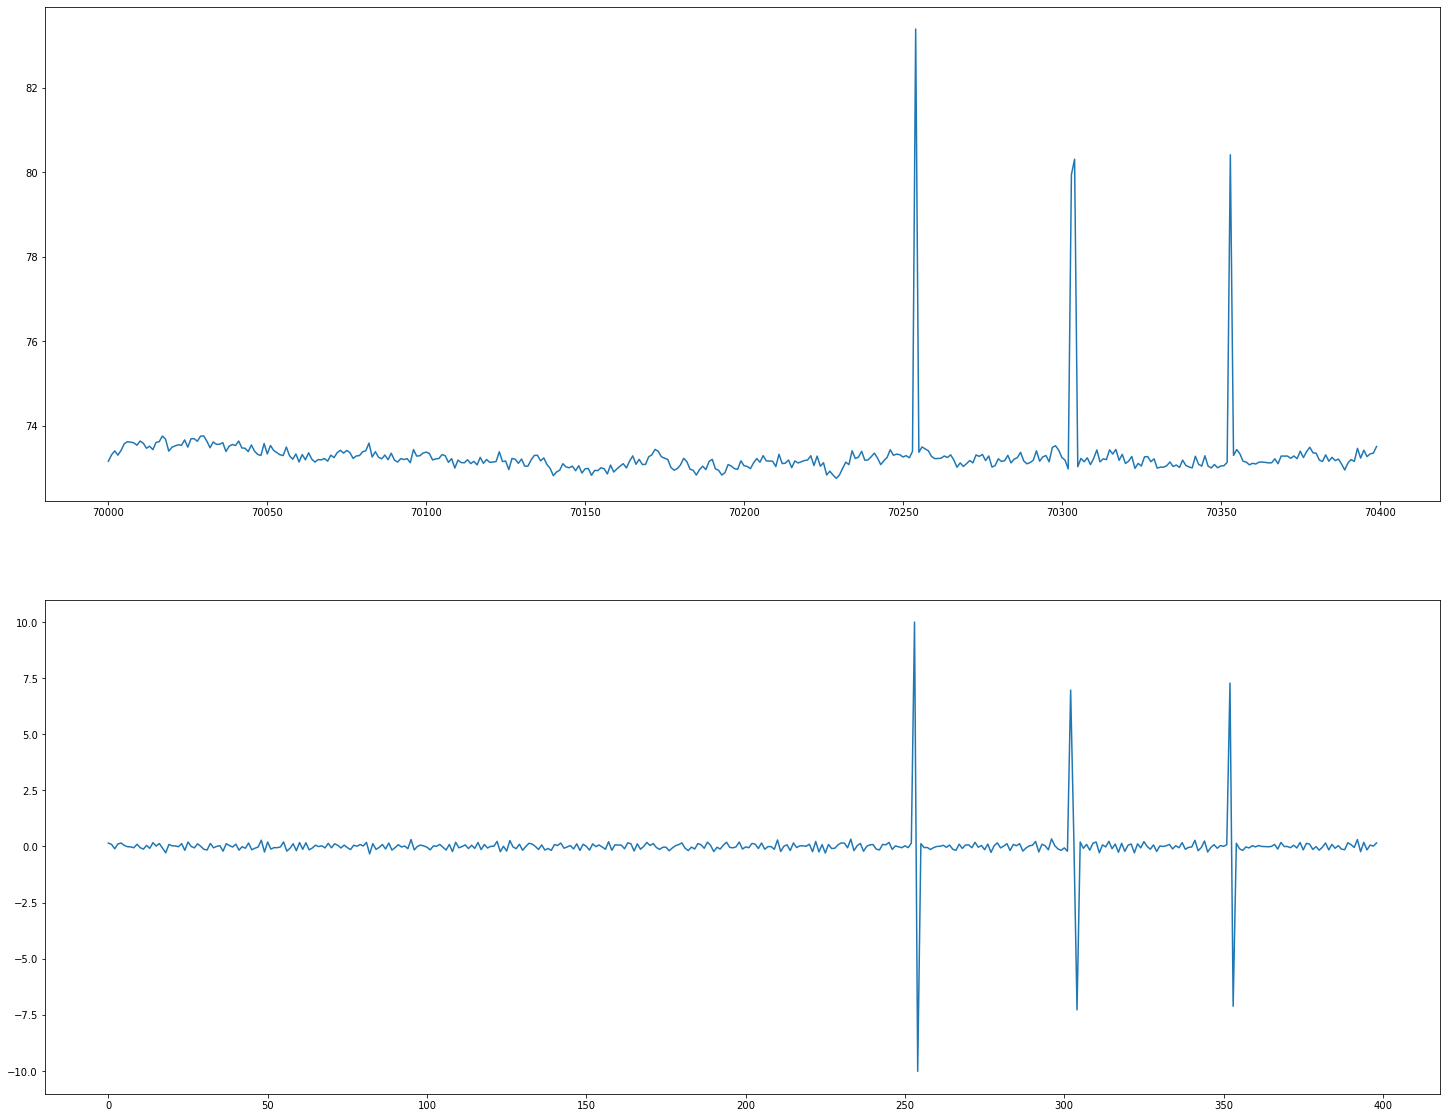

In [87]:
fig = plt.figure(figsize=[25,20])
maxlen=1000
sub1=plt.subplot(2,1,1)
plt.plot(data["Item1.Item1.Item1.brightAverage"][70000:70400])
sub2=plt.subplot(2,1,2)
plt.plot(np.diff(data["Item1.Item1.Item1.brightAverage"][70000:70400]))

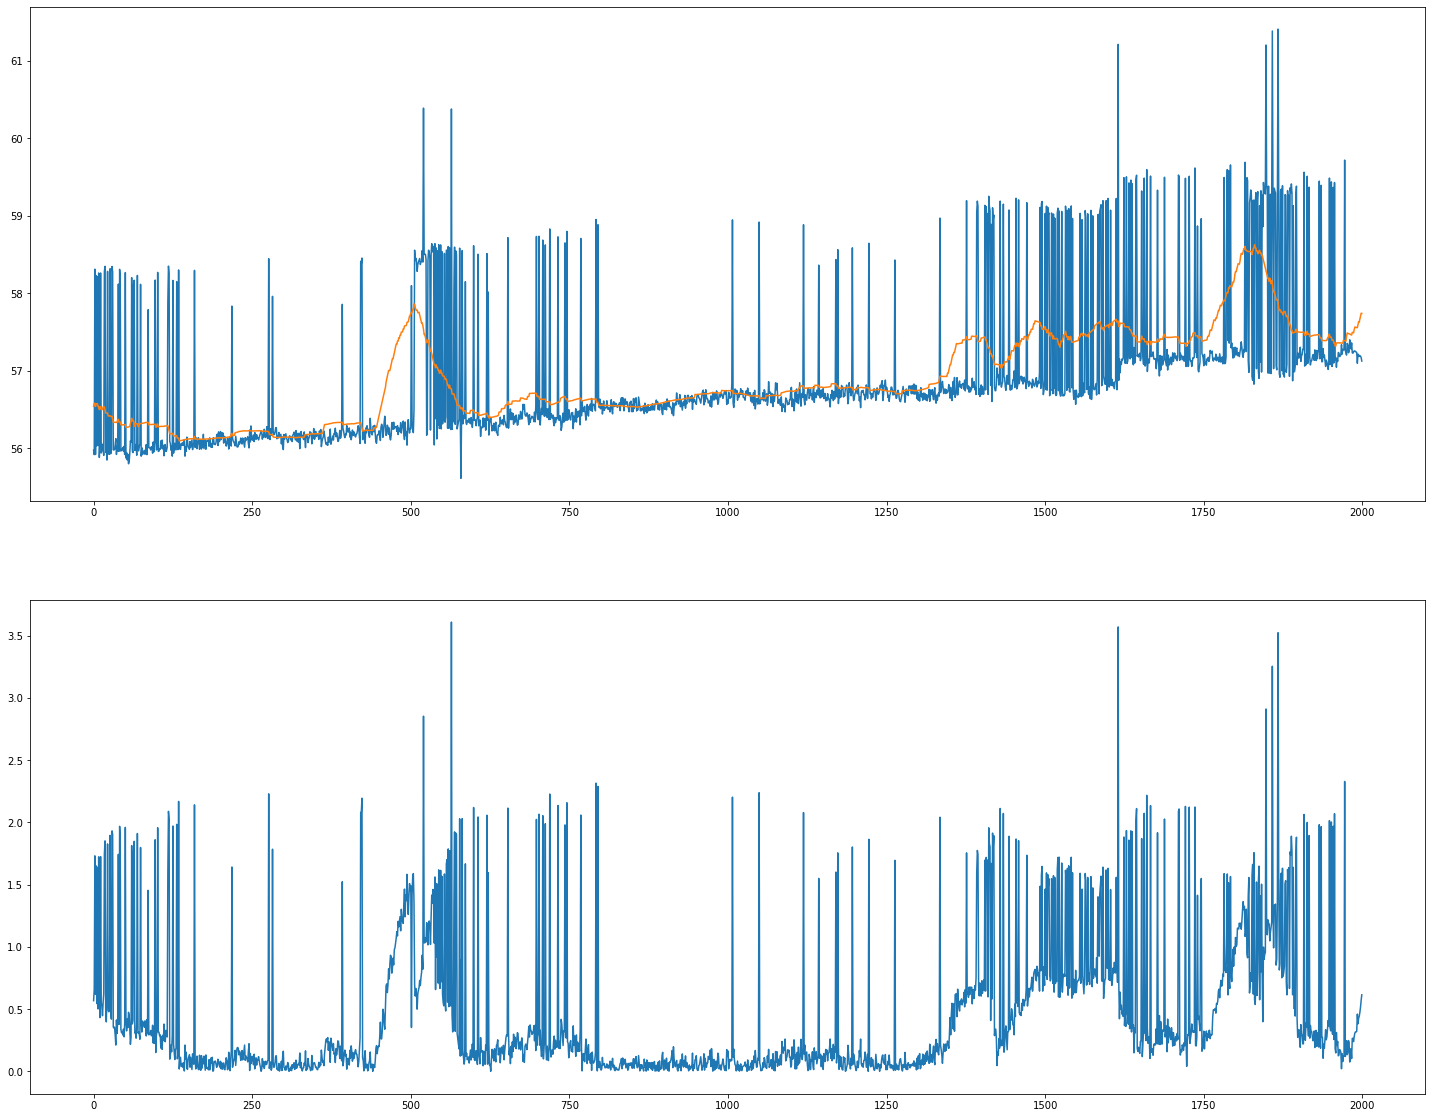

In [11]:
#plot one raw, one average and one detrended
fig = plt.figure(figsize=[25,20])
sub1 = plt.subplot(2,1,1)
plt.plot(data["Item1.Item1.Item1.brightAverage"][0:maxlen])
plt.plot(data["Item1.Item1.Item2.runningAverage"][0:maxlen])
sub2 = plt.subplot(2,1,2)
plt.plot(detrended.ROI1[0:maxlen])

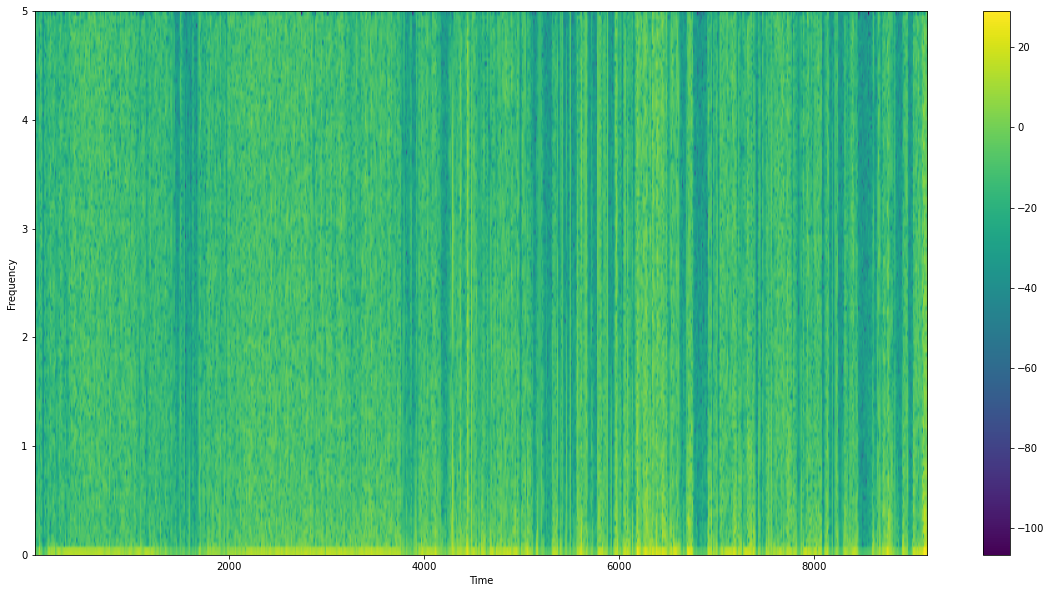

In [57]:
#plt.plot(detrended.ROI1[0:3000])
fig = plt.figure(figsize=[20,10])
powerSpectrum, frequenciesFound, time, imageAxis = plt.specgram(detrended.ROI1, Fs=10)
plt.xlabel('Time')
plt.ylabel('Frequency')
fig.colorbar(imageAxis)

6.370833333333334